In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Import Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#@title Data
data = yf.download(tickers = "NQ=F", period = '7d' ,interval = "1m", ignore_tz = True, prepost = False)

[*********************100%***********************]  1 of 1 completed


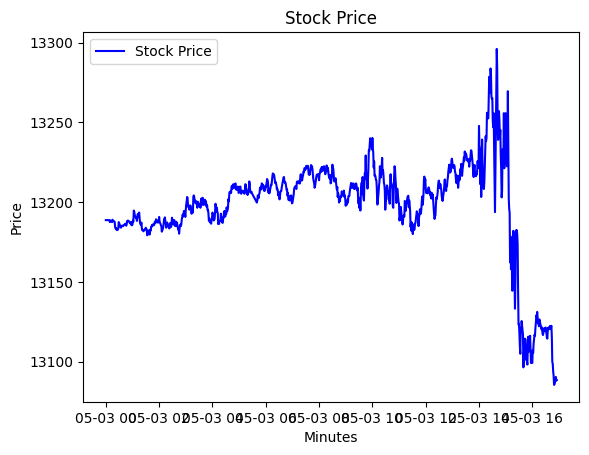

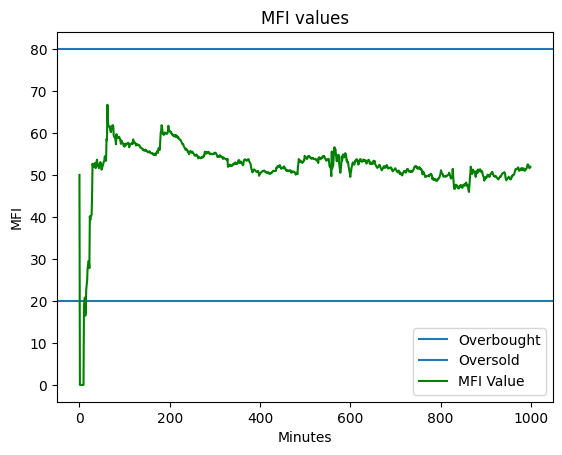

In [ ]:
#@title Harpreet's Cell
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np

df = data


def calculate_ema(prices, days, smoothing=2):
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    return ema




def plot_ema(currentpoint,k1 = 20,k2 = 200,toPlot = True):


  stockPrice= df['Close'][max(0,currentpoint - k2):currentpoint+1]

  ema1 = [0] * len(stockPrice)
  ema2 = [0] * len(stockPrice)

  ema1[0] = stockPrice[0]
  ema2[0] = stockPrice[0]
  #ema = stockValue*(alpha /(k1 + 1)  +   ema[i-1] * ((1- alpha)/(k1 + 1)))



  for i in range(1,len(stockPrice)):
    point_gap = k1 + 1

    if i <= k1-1:
      point_gap = i + 2
    alpha = 2/(k1 + 1)
    ema1[i] = stockPrice[i] * alpha + (1 - alpha) * (ema1[i-1])

    point_gap = k2 + 1
    if i <= k2-1:
      point_gap = i + 2

    alpha = 2/(k2 + 1)
    ema2[i] = stockPrice[i] * alpha + (1 - alpha) * (ema2[i-1])

  # cond1 = ema1[-2] < ema2[-2]
  # cond2 = ema1[-2] > ema2[-2]

  cond1 = True
  cond2 = True

  if ema1[-1] >= ema2[-1] and cond1:
    return 1
  elif ema1[-1] <= ema2[-1] and cond2:
    return -1
  else:
    return 0


  if toPlot == True:
    print(f'Profit booked  : {profit}')

    plt.plot(stockPrice,label = "Stock Price",color = 'blue')
    plt.plot(ema1, label="EMA1 Values",color = 'green')
    plt.plot(ema2, label="EMA2 Values",color = 'red')
    plt.xlabel("Minutes")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
  else:
    print(k1,k2,profit)
  return profit



##########################################RSI Function###################

def rsi(currentprice,period,toPlot = False):
  stockPriceClose = df['Close'][max(0,currentprice - period):currentprice + 1]
  stockPriceOpen = df['Open'][max(0,currentprice - period):currentprice + 1]

  rsi_values = []
  rsi_values.append(50)

  for i in range(1,len(stockPriceClose)):
    avg_gain = 0
    avg_loss = 0
    loss_days = 0
    gain_days = 0

    for j in range(i,max(i - period -1, -1),-1) :
      if stockPriceClose[j] > stockPriceOpen[j]:
        gain_days+=1
        avg_gain += stockPriceClose[j] - stockPriceOpen[j]
      else :
        loss_days+=1
        avg_loss += stockPriceOpen[j] - stockPriceClose[j]

    if gain_days != 0:
      avg_gain /= gain_days

    if loss_days != 0:
      avg_loss /= loss_days

    if avg_loss == 0:
      rsi_values.append(100)
    else:
      rs = avg_gain/avg_loss
      rsi_values.append(100 - 100/(1 + rs))

    if(rsi_values.back() > 70):
      return -1
    elif rsi_values.back() < 30:
      return 1
    else:
      return 0

  if toPlot == True:
    plt.title("Stock Price")
    plt.plot(stockPriceClose,label = "Stock Price",color = 'blue')
    plt.xlabel("Minutes")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
    print(' ')

    plt.title("RSI values")
    plt.axhline(80,label = 'Overbought')
    plt.axhline(20,label = 'Oversold')
    plt.xlabel("Minutes")
    plt.ylabel("RSI")
    plt.plot(rsi_values, label="RSI Value",color = 'green')
    plt.legend()
    plt.show()


  #bare trading
# rsi(limit = 5000,period = 50,toPlot = True)

 ################################# MFI ###############################



def mfi(limit,period,toPlot = False):
  stockPriceClose = df['Close'][:limit]
  stockPriceHigh = df['High'][:limit]
  stockPriceOpen =df['Open'][:limit]
  volume = df['Volume'][:limit]

  stockPriceTypical = (stockPriceClose + stockPriceHigh )/2
  mfi = []
  raw_moneyFlow_values = []
  raw_moneyFlow_values.append(50)
  mfi.append(50)
  for i in range(1,len(stockPriceClose)):
    avg_gain = 0
    avg_loss = 0
    loss_days = 0
    gain_days = 0

    raw_moneyFlow_values.append(stockPriceTypical[i] * volume[i])

    for j in range(i,max(i - period -1, -1),-1) :


      if stockPriceClose[j] > stockPriceOpen[j]:
        gain_days+=1
        avg_gain += raw_moneyFlow_values[j]
      else :
        loss_days+=1
        avg_loss += raw_moneyFlow_values[j]

    if gain_days != 0:
      avg_gain /= gain_days

    if loss_days != 0:
      avg_loss /= loss_days

    if avg_loss == 0:
      mfi.append(100)
    else:
      rs = avg_gain/avg_loss
      mfi.append(100 - 100/(1 + rs))


  if toPlot == True:
    plt.title("Stock Price")
    plt.plot(stockPriceClose,label = "Stock Price",color = 'blue')
    plt.xlabel("Minutes")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
    print(' ')

    plt.title("MFI values")
    plt.axhline(80,label = 'Overbought')
    plt.axhline(20,label = 'Oversold')
    plt.xlabel("Minutes")
    plt.ylabel("MFI")
    plt.plot(mfi, label="MFI Value",color = 'green')
    plt.legend()
    plt.show()

mfi(limit = 1000,period = 200,toPlot = True)

    ############################

In [ ]:
#@title Aditya's Cell
def MACD(data):
  price = data['Close']
  exp1 = price.ewm(span = 12, adjust = False).mean()
  exp2 = price.ewm(span = 26, adjust = False).mean()
  macd = pd.DataFrame(exp1 - exp2)
  signal = pd.DataFrame(macd.ewm(span = 9, adjust = False).mean())
  macd = macd.values
  signal = signal.values
  sig = []
  for i in range(len(macd)):
    if(macd[i]>signal[i] and macd[i]<0):
      sig.append(1)
    elif(macd[i]<signal[i] and macd[i]>0):
      sig.append(-1)
    else:
      sig.append(0)
  return sig

def stochastic(data):
  stochastic = []
  lookback = 14
  period = 3
  high = data['High']
  low = data['Low']
  price = data['Close']
  highh = high.rolling(lookback).max()
  lowl = low.rolling(lookback).min()
  k = 100 * ((price - lowl) / (highh - lowl))
  d = k.rolling(period).mean()
  prices = data['Close']
  sig = []
  for i in range(prices.shape[0]):
    if(k[i]<20 and d[i]<20 and k[i]>d[i]):
      sig.append(1)
    elif(k[i]>80 and d[i]>80 and d[i]>k[i]):
      sig.append(-1)
    else:
      sig.append(0)
  return sig

def williams(data):
  william_r = []
  lookback = 14
  high = data['High']
  low = data['Low']
  price = data['Close']
  highh = high.rolling(lookback).max()
  lowl = low.rolling(lookback).min()
  william_r = -100 * ((highh - price) / (highh - lowl))
  william_r = william_r.values
  closing_values = data['Close'].values
  prices = data['Close'].values
  sig = []
  for i in range(len(william_r)):
    if(william_r[i-1]>-80 and william_r[i]<-80 ):
      sig.append(1)
    elif(william_r[i-1]<-20 and william_r[i]>-20):
      sig.append(-1)
    else:
      sig.append(0)
  return sig

def donchian(data):
  don = []
  lookback = 14
  high = data['High']
  low = data['Low']
  price = data['Close']
  highh = high.rolling(lookback).max()
  lowl = low.rolling(lookback).min()
  don = (highh+lowl)/2
  don = don.values
  a = 250
  b = 500
  len = [i for i in range(a,b)]
  closing_values = data['Close'].values
  closing_values = [closing_values[x] for x in range(a,b)]
  high_values = highh.values
  high_values = [high_values[x] for x in range(a,b)]
  low_values = lowl.values
  low_values = [low_values[x] for x in range(a,b)]
  don_values = [don[x] for x in range(a,b)]
  # moving_average = [ma[x] for x in range(a,b)]
  # plt.plot(closing_values,label='Stock Prices')
  h = high.values
  l = low.values
  h = [h[i] for i in range(a,b)]
  l = [l[i] for i in range(a,b)]
  return

def ADX(data):
  lookback = 14
  high = data['High']
  low = data['Low']
  close = data['Close']
  dm_pos = data['High'].diff()
  dm_pos[dm_pos<0] = 0
  dm_neg = data['Low'].diff()
  dm_neg[dm_neg>0] = 0
  tr1 = pd.DataFrame(high - low)
  tr2 = pd.DataFrame(abs(high - close.shift(1)))
  tr3 = pd.DataFrame(abs(low - close.shift(1)))
  frames = [tr1, tr2, tr3]
  tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
  atr = tr.rolling(lookback).mean()
  plus_di = 100 * (dm_pos.ewm(alpha = 1/lookback).mean() / atr)
  minus_di = abs(100 * (dm_neg.ewm(alpha = 1/lookback).mean() / atr))
  dx = (abs(plus_di - minus_di) / abs(plus_di + minus_di)) * 100
  adx = ((dx.shift(1) * (lookback - 1)) + dx) / lookback
  adx_smooth = adx.ewm(alpha = 1/lookback).mean()
  prices = data['Close']
  sig = []
  for i in range(1,prices.shape[0]):
    if(adx[i-1]<25 and adx[i]>25 and plus_di[i]>minus_di[i]):
      sig.append(1)
    elif(adx[i-1]<25 and adx[i]>25 and minus_di[i]>plus_di[i]):
      sig.append(-1)
    else:
      sig.append(0)
  return sig

def Aroon(data):
  period = 25
  high = data['High'].rolling(period+1).apply(lambda x: x.argmax(), raw=True)
  low = data['Low'].rolling(period+1).apply(lambda x: x.argmin(), raw=True)
  aroon_up = pd.Series((period - high) / period * 100, name='Aroon Up')
  aroon_down = pd.Series((period - low) / period * 100, name='Aroon Down')
  a = 300
  b = 450
  prices = data['Close']
  ma = prices.ewm(span = 200, adjust = False).mean()
  ma = ma.values
  sig = []
  isbought = False
  buy = 0
  sell = 0
  for i in range(prices.shape[0]):
    if(aroon_up[i]>=70 and aroon_down[i]<=30 and prices[i]>ma[i]):
      sig.append(1)
    elif(aroon_up[i]<=30 and aroon_down[i]>=70 and prices[i]<ma[i]):
      sig.append(-1)
    else:
      sig.append(0)
  return sig

In [ ]:
def bollinger(data, t_window):
  data['SMA'] = data.Close.rolling(window=t_window).mean()
  data['STDDEV'] = data.Close.rolling(window=t_window).std()
  data['UPP_BAND' ]= data.SMA + 2*data.STDDEV
  data['LOW_BAND' ]= data.SMA - 2*data.STDDEV
  # data["BUY_SIG"] = np.where(data.LOW_BAND>data.Close , True , False)
  # data["SELL_SIG"] = np.where(data.UPP_BAND<data.Close , True , False)
  data =data.dropna()
  buy = []
  sell =[]
  open_pos = False
  data = data.reset_index()
  for i in range(len(data)):
      if(data.LOW_BAND[i]>data.Close[i]):
        if open_pos == False:
          open_pos = True
          buy.append(i)
      elif data.UPP_BAND[i]<data.Close[i]:
        if open_pos :
          open_pos = False
          sell.append(i)
  return data,buy,sell
data,buy,sell = bollinger(data,13)


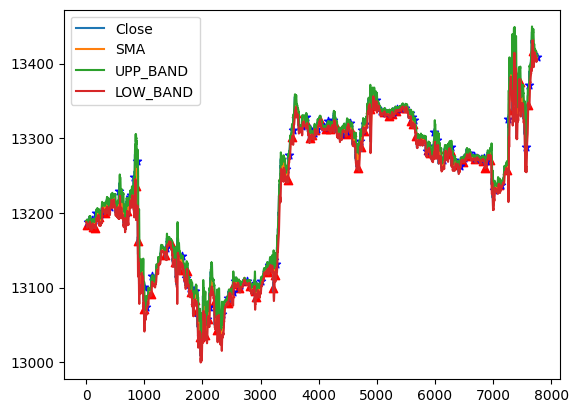

In [ ]:
plt.plot(data[['Close','SMA','UPP_BAND','LOW_BAND']])
plt.scatter(data.iloc[buy].index , data.iloc[buy].Close,marker = '^',color = 'r')
plt.scatter(data.iloc[sell].index , data.iloc[sell].Close,marker = '*',color = 'b')
plt.legend(['Close','SMA','UPP_BAND','LOW_BAND'])
plt.show()

In [ ]:
merge = pd.concat([data.iloc[buy].Close, data.iloc[sell].Close],axis = 1)
merge.columns  = [ 'buy','sell']
merge = merge.reset_index()
merge.set_index("index", inplace=True)
merge = merge.sort_values("index")
merge

,buy,sell
index,,
9,13184.25,NaN
35,NaN,13188.25
64,13187.00,NaN
107,NaN,13190.75
113,13181.50,NaN
...,...,...
7573,NaN,13287.75
7609,13344.50,NaN
7622,NaN,13371.75


In [ ]:
totalprofit = ((merge.shift(-1).sell - merge.buy)/merge.buy  )
totalprofit.mean()

0.00026966681537701217

In [ ]:
#@title Fibonacci
def fibonacci_signal(data):
    # Calculate Fibonacci retracement levels
    low = df['Adj Close'].min()
    high = df['Adj Close'].max()
    levels = [0, 0.236, 0.382, 0.5, 0.618, 0.786, 1.0]
    diffs = [high - low, high - low, high - low, high - low, high - low, high - low, 0]
    retracements = [high - diff * level for level, diff in zip(levels, diffs)]

    # Generate buy and sell signals
    df['buy'] = np.where(df['Adj Close'] <= retracements[1], 1, 0)
    df['sell'] = np.where(df['Adj Close'] >= retracements[-2], 1, 0)

    # Plot Fibonacci retracement levels
    # plt.figure(figsize=(12, 6))
    # plt.plot(df.index, df['Adj Close'])
    # for level in retracements:
        # plt.axhline(level, linestyle='--', color='gray')
    # plt.show()

    # Return buy and sell signals
    return df[['Adj Close', 'buy', 'sell']]

ROHAN'S INDICATORS

In [ ]:
data = yf.download(tickers = "NQ=F", period = '7d',interval = '1m', ignore_tz = True, prepost = False)
print(data.head())
print(data.shape)

[*********************100%***********************]  1 of 1 completed
                         Open      High       Low     Close  Adj Close  Volume
Datetime                                                                      
2023-05-03 00:00:00  13188.75  13188.75  13188.75  13188.75   13188.75       0
2023-05-03 00:01:00  13188.75  13188.75  13188.75  13188.75   13188.75      34
2023-05-03 00:02:00  13188.75  13188.75  13188.75  13188.75   13188.75      97
2023-05-03 00:03:00  13188.75  13188.75  13188.75  13188.75   13188.75      28
2023-05-03 00:04:00  13188.75  13188.75  13188.75  13188.75   13188.75     104
(7774, 6)


PVT

In [ ]:
def price_volume_trend(df):
    df['PVT'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)) * df['Volume']
    df['PVT'] = df['PVT'].cumsum()
    return df['PVT']

In [ ]:
pvt = price_volume_trend(data)
pvt

Datetime
2023-05-03 00:00:00          NaN
2023-05-03 00:01:00     0.000000
2023-05-03 00:02:00     0.000000
2023-05-03 00:03:00     0.000000
2023-05-03 00:04:00     0.000000
                         ...    
2023-05-10 16:55:00    45.611688
2023-05-10 16:56:00    45.618606
2023-05-10 16:57:00    45.618606
2023-05-10 16:58:00    45.614802
2023-05-10 16:59:00    45.614802
Name: PVT, Length: 7774, dtype: float64

Text(0.5, 1.0, 'PVT Values')

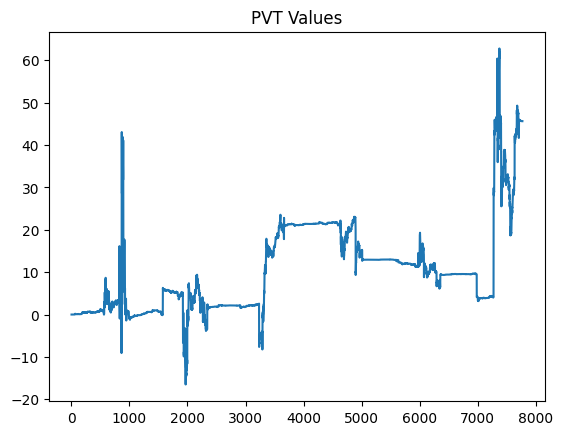

In [ ]:
plt.plot(data['PVT'].values)
plt.title('PVT Values')

VWAP

In [ ]:
def vwap(df):
    df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3
    df['TPV'] = df['TP'] * df['Volume']
    vwap = df['TPV'].sum() / df['Volume'].sum()
    return vwap

In [ ]:
vwap_value = vwap(data)
print("VWAP is:", vwap_value)

VWAP is: 13246.264353656596


In [ ]:
import pandas as pd

# Import data
# data = pd.read_csv("your_data_file.csv")

# Set the intraday interval to 10 minutes
interval = "5T"

# Convert the timestamp column to a datetime format
# data["timestamp"] = pd.to_datetime(data["timestamp"])

# Set the timestamp column as the index
#data.set_index("timestamp", inplace=True)

# Resample the data into 10-minute intervals and calculate the volume-weighted average price
vwap = data.resample(interval).apply(lambda x: (x["Close"] * x["Volume"]).sum() / x["Volume"].sum())

print(type(vwap))


<ipython-input-17-ac793d30c740>:16: RuntimeWarning: invalid value encountered in double_scalars
  vwap = data.resample(interval).apply(lambda x: (x["Close"] * x["Volume"]).sum() / x["Volume"].sum())


<class 'pandas.core.series.Series'>


In [ ]:
print([i for i in vwap.dropna().values])

[13198.25, 13198.135416666666, 13196.921052631578, 13199.135416666666, 13199.75, 13197.926470588236, 13197.790760869566, 13195.823717948719, 13195.74358974359, 13195.9140625, 13199.002747252747, 13196.463963963964, 13194.722222222223, 13193.348484848484, 13195.70079787234, 13194.805555555555, 13195.726694915254, 13194.805084745763, 13193.87676056338, 13194.155660377359, 13192.605691056911, 13194.178057553956, 13195.51893939394, 13195.584170854272, 13189.846682847896, 13189.68475609756, 13194.248422712933, 13196.31766055046, 13197.415024630542, 13198.050218340612, 13197.109712230216, 13197.927083333334, 13194.408967391304, 13187.844608879492, 13187.910857908848, 13187.349593495936, 13188.484402079723, 13184.882085020243, 13197.971624850657, 13202.673533083645, 13211.978879706152, 13208.895833333334, 13210.25, 13209.199489795918, 13206.056563039723, 13209.513310185184, 13208.577160493827, 13206.580631399318, 13197.667372881357, 13191.705185185185, 13186.821527777778, 13186.364220183486, 

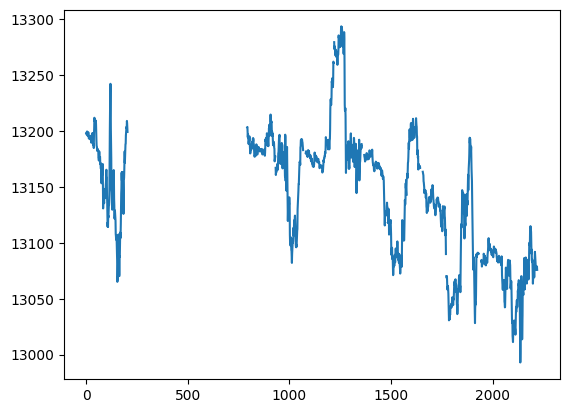

In [ ]:
plt.plot(vwap.values)

OBV

In [ ]:
def obv(df):
    df['OBV'] = 0
    df['OBV'] = df['Volume'].where(df['Close'] >= df['Close'].shift(1), -df['Volume'])
    df['OBV'] = df['OBV'].cumsum()
    return df['OBV']

In [ ]:
obv(data)

Datetime
2023-04-14 00:00:00        0
2023-04-14 00:01:00       21
2023-04-14 00:02:00       55
2023-04-14 00:03:00      134
2023-04-14 00:04:00      318
                       ...  
2023-04-21 16:55:00    51184
2023-04-21 16:56:00    51267
2023-04-21 16:57:00    51355
2023-04-21 16:58:00    51306
2023-04-21 16:59:00    51173
Name: OBV, Length: 7819, dtype: int64

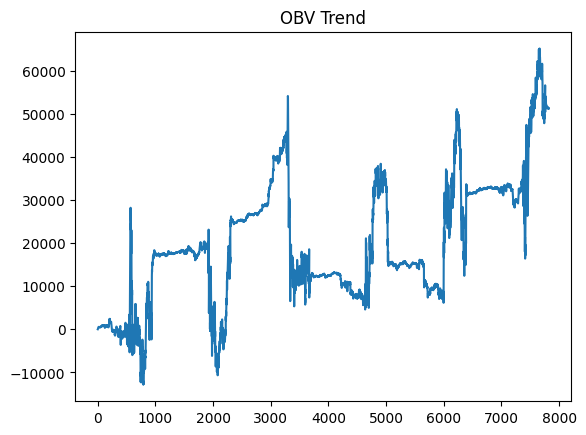

In [ ]:
plt.plot(data['OBV'].values)
plt.title('OBV Trend')
plt.show()

In [ ]:
def pvt(data):
    prices = data['Close'].values
    volumes = data['Volume'].values
    # Initialize the PVT value and signal list with the first value
    pvt = [0]
    signals = [0]
    # Loop through the prices and volumes to calculate the PVT value and signals
    for i in range(1, len(prices)):
        pvt_value = ((prices[i] - prices[i-1]) / prices[i-1]) * volumes[i] + pvt[-1]
        pvt.append(pvt_value)

        if pvt[-1] > pvt[-2]:
            signals.append(1)  # Buy signal
        elif pvt[-1] < pvt[-2]:
            signals.append(-1)  # Sell signal
        else:
            signals.append(0)  # No signal
    return signals

# 16 April 2023

In [ ]:
data = yf.download(tickers = "NQ=F", period = '5y' ,interval = "1d", ignore_tz = True, prepost = False)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-10,6896.00,6971.25,6888.75,6965.00,6965.00,292974
2018-05-11,6949.50,6979.50,6928.25,6960.00,6960.00,263016
2018-05-14,6958.25,7013.50,6955.50,6974.00,6974.00,255900
2018-05-15,6969.00,6976.75,6854.25,6890.50,6890.50,432917
2018-05-16,6895.50,6953.50,6875.50,6937.25,6937.25,274261
...,...,...,...,...,...,...
2023-05-04,13064.00,13173.00,13001.75,13043.75,13043.75,656440
2023-05-05,13060.00,13359.00,13055.75,13317.75,13317.75,573291
2023-05-08,13316.00,13368.00,13254.50,13352.25,13352.25,506054


In [ ]:
values = data["Close"].values

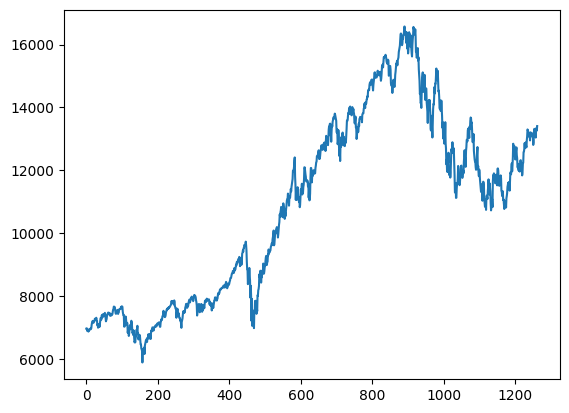

In [ ]:
plt.plot(values)
plt.show()

In [ ]:
correct_buy = []
for i in range(len(values)):
  buy_val = values[i]
  target_val = buy_val + 30
  interval = 300
  if target_val <= max(values[i:i + interval]): correct_buy.append(1)
  else: correct_buy.append(0)

In [ ]:
# EMA
sig_ema = []
for i in range(len(values)):
  sig_ema.append(plot_ema(i,toPlot = False))

In [ ]:
def evaluate(pred_buy,correct_buy):
  correct_buys = 0
  wrong_buys = 0
  n = min(len(correct_buy),len(pred_buy))
  for i in range(n):
    if correct_buy[i] == 1 and pred_buy[i] == 1: correct_buys += 1
    elif pred_buy[i] == 1 and correct_buy != 1: wrong_buys += 1
  return 100*correct_buys/(correct_buys + wrong_buys)

In [ ]:
all_acc = []

In [ ]:
all_acc.append(sig_ema)
print('Ema buy accuracy:',evaluate(sig_ema,correct_buy))
sig_stc = stochastic(data)
print(len(sig_stc))
all_acc.append(sig_stc)
print('Stochastic buy accuracy:',evaluate(sig_stc,correct_buy))
sig_fib = fibonacci_signal(data)
sig_fib = sig_fib['buy'].values
print(len(sig_fib))
all_acc.append(sig_fib)
print('Fibonacci buy accuracy:',evaluate(sig_fib,correct_buy))
sig_macd = MACD(data)
all_acc.append(sig_macd)
# print(len(sig_macd))
print('MACD buy accuracy:',evaluate(sig_macd,correct_buy))
sig_will = williams(data)
all_acc.append(sig_will)
# print(len(sig_will))
print('Williams buy accuracy:',evaluate(sig_will,correct_buy))
sig_ar = Aroon(data)
all_acc.append(sig_ar)
# print(len(sig_ar))
print('Aroon buy accuracy:',evaluate(sig_ar,correct_buy))
sig_adx = ADX(data)
all_acc.append(sig_adx)
# print(len(sig_adx))
print('ADX buy accuracy:',evaluate(sig_adx,correct_buy[1:]))


Ema buy accuracy: 99.71910112359551
1262
Stochastic buy accuracy: 100.0
7774
Fibonacci buy accuracy: 98.33597464342314
MACD buy accuracy: 100.0
Williams buy accuracy: 97.29729729729729
Aroon buy accuracy: 95.91836734693878
ADX buy accuracy: 100.0


In [ ]:
import random
mixed_sig = []
for i in range(min(len(sig_adx),len(sig_fib))):
  if(sig_fib[i] == sig_adx[i] and sig_fib[i] == 1):
    mixed_sig.append(1)
  elif(sig_fib[i]==1):
    # mixed_sig.append(random.randint(0,1))
    mixed_sig.append(0)
  else:
    mixed_sig.append(0)

In [ ]:
evaluate(mixed_sig, correct_buy)

97.72727272727273



Results for optimal Combinations : 1

Total points in data available 1262

Accuracy achieved 97.79507133592736

771


Results for optimal Combinations : 2

Total points in data available 1262

Accuracy achieved 99.26739926739927

546


Results for optimal Combinations : 3

Total points in data available 1262

Accuracy achieved 99.26739926739927

546


Results for optimal Combinations : 4

Total points in data available 1262

Accuracy achieved 98.72340425531915

235


Results for optimal Combinations : 5

Total points in data available 1262

Accuracy achieved 98.72340425531915

235


Results for optimal Combinations : 6

Total points in data available 1262

Accuracy achieved 100.0

103


Results for optimal Combinations : 7

Total points in data available 1262

Accuracy achieved 100.0

103


Results for optimal Combinations : 8

Total points in data available 1262

Accuracy achieved 100.0

10


Results for optimal Combinations : 9

Total points in data available 1262

Accuracy achieve

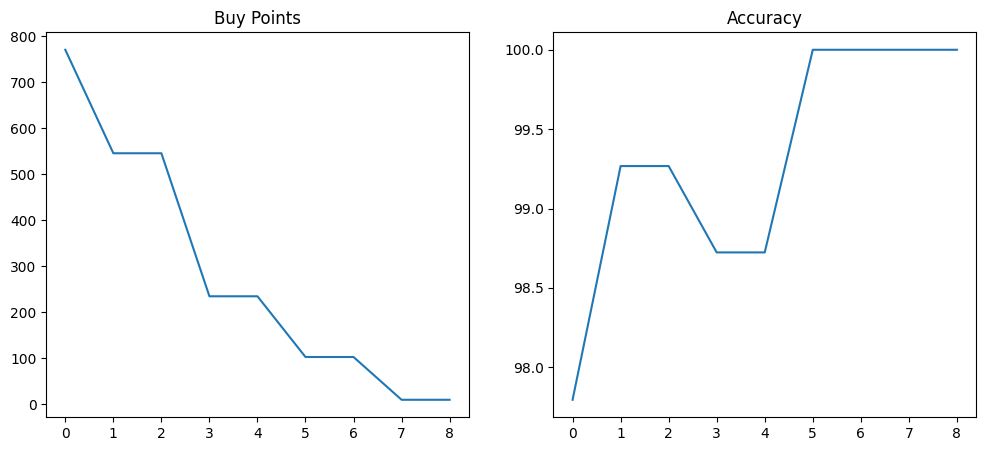

In [ ]:
def optimalCombination(optimalIndicators):

  alpha = []

  minnLength = float('inf')

  for i in all_acc:
    minnLength = min(len(i),minnLength)

  for i in range(minnLength):
    k = 0
    for j in range(len(all_acc)):
      k+=all_acc[j][i]

    if k>=optimalIndicators: alpha.append(1)
    else: alpha.append(0)
  acc = evaluate(alpha,correct_buy)
  print(f"\n\nResults for optimal Combinations : {optimalIndicators}\n")
  print(f"Total points in data available {(len(all_acc[0]))}\n")
  print(f"Accuracy achieved {acc}\n")

  ones = 0

  for i in alpha:
    if i == 1: ones+=1

  print(ones)

  return ones,acc


accuracies = []
buyPoints = []

for i in range(1,10):
  buypts,acc = optimalCombination(i)
  buyPoints.append(buypts)
  accuracies.append(acc)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].plot(buyPoints)
axes[0].set_title('Buy Points')
axes[1].set_title('Accuracy')
axes[1].plot(accuracies)
plt.show()